In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("eda_ecommerce.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,new gi
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,24.896667
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3.638095
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,15.443333
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,22.179048
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,28.770000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Date'].dtype

dtype('<M8[ns]')

In [7]:
df['Date'].values

array(['2019-01-05T00:00:00.000000000', '2019-03-08T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-03-25T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-02-24T00:00:00.000000000',
       '2019-01-10T00:00:00.000000000', '2019-02-20T00:00:00.000000000',
       '2019-02-06T00:00:00.000000000', '2019-03-09T00:00:00.000000000',
       '2019-02-12T00:00:00.000000000', '2019-02-07T00:00:00.000000000',
       '2019-03-29T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
       '2019-03-11T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-03-11T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-03-05T00:00:00.000000000',
       '2019-03-15T00:00:00.000000000', '2019-02-17T00:00:00.000000000',
       '2019-03-02T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-03-10

In [8]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,new gi,day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,24.896667,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3.638095,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,15.443333,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,22.179048,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,28.770000,8,2


In [12]:
df['Time'].dtype

dtype('O')

In [13]:
df['Time'] = pd.to_datetime(df['Time'])
df['hours'] = df['Time'].dt.hour

C:\Users\ITI\AppData\Local\Temp\ipykernel_16424\1130491616.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,new gi,day,month,hours
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,24.896667,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-01-05 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3.638095,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-01-05 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,15.443333,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-01-05 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,22.179048,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-01-05 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,28.770000,8,2,10


In [15]:
monthly_sales = df.groupby('month')['Total'].sum()
monthly_sales

month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

In [19]:
percentage_sales_month = (monthly_sales/monthly_sales.sum())*100
percentage_sales_month

month
1    36.007381
2    30.101976
3    33.890643
Name: Total, dtype: float64

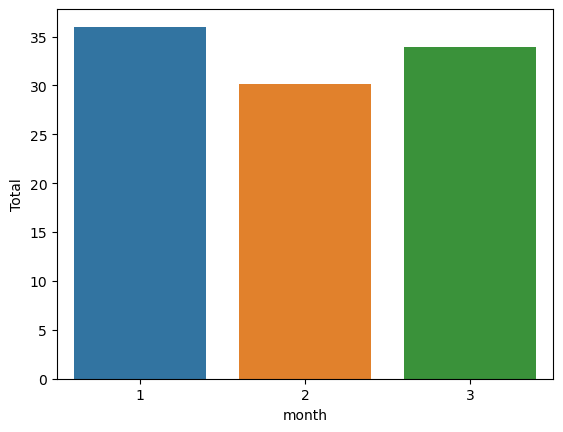

In [21]:
sns.barplot(df, x = percentage_sales_month.index, y = percentage_sales_month);

In [22]:
daily_sales = df.groupby('day')['Total'].sum()
daily_sales

day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

In [23]:
percentage_sales_daily = (daily_sales/daily_sales.sum())*100
percentage_sales_daily

day
1     3.041825
2     3.915808
3     3.839166
4     2.463914
5     3.962851
6     2.976227
7     3.560959
8     4.181166
9     4.262756
10    3.054556
11    2.978129
12    3.672608
13    1.687186
14    4.221903
15    4.866588
16    3.079983
17    3.225909
18    1.724430
19    4.608287
20    3.659841
21    1.753541
22    2.268416
23    3.848328
24    3.592313
25    3.647611
26    2.733467
27    4.148467
28    2.887644
29    2.334546
30    2.181439
31    1.620135
Name: Total, dtype: float64

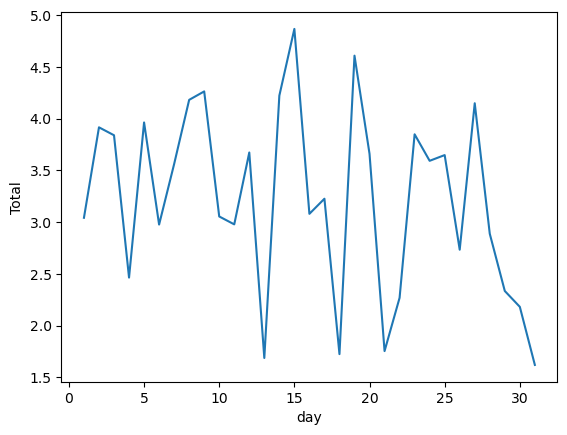

In [25]:
sns.lineplot(x = percentage_sales_daily.index, y = percentage_sales_daily);

In [28]:
hour_sales = df.groupby('hours')['Total'].sum()
hour_sales

hours
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

In [30]:
percentage_sales_hour = (hour_sales/hour_sales.sum())*100
percentage_sales_hour

hours
10     9.729014
11     9.405714
12     8.070764
13    10.751332
14     9.545379
15     9.654092
16     7.810811
17     7.568958
18     8.059758
19    12.292136
20     7.112041
Name: Total, dtype: float64

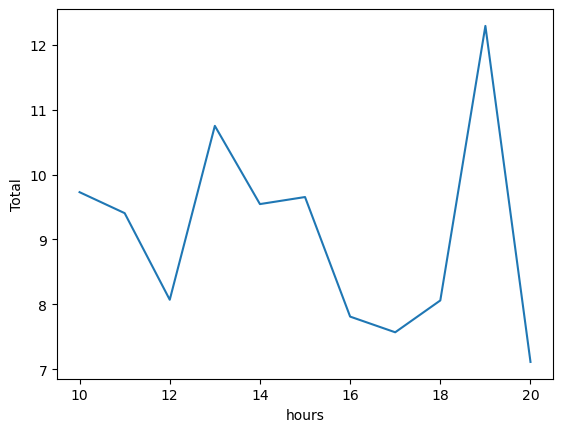

In [31]:
sns.lineplot(x = percentage_sales_hour.index, y = percentage_sales_hour);